In [30]:
# Module Importations
import matplotlib.pylab as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

In [31]:
def load_motor_data():
    """Load Dataset
    ======================================
    Loads dataset from user-specified directory.
    
    Args:
        None.
        
    Returns:
        dataframe (dataframe) - Dataframe loaded with data from csv.
    """

    file_string = r'C:\Users\ASUS-PC\OneDrive\Cloudforest Technologies\M. Projects\Yellow Cuckoo\pmsm_temperature_data.csv'
    return pd.read_csv(file_string)

In [32]:
# Load dataset.
original_dataset = load_motor_data()

In [33]:
# View motor dataset macro data
print(original_dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 998070 entries, 0 to 998069
Data columns (total 13 columns):
ambient           998070 non-null float64
coolant           998070 non-null float64
u_d               998070 non-null float64
u_q               998070 non-null float64
motor_speed       998070 non-null float64
torque            998070 non-null float64
i_d               998070 non-null float64
i_q               998070 non-null float64
pm                998070 non-null float64
stator_yoke       998070 non-null float64
stator_tooth      998070 non-null float64
stator_winding    998070 non-null float64
profile_id        998070 non-null int64
dtypes: float64(12), int64(1)
memory usage: 99.0 MB
None


In [34]:
# View motor dataset statistics
print(original_dataset.describe())

ambient        coolant            u_d            u_q  \
count  998070.000000  998070.000000  998070.000000  998070.000000   
mean       -0.003905       0.004723       0.004780      -0.005690   
std         0.993127       1.002423       0.997878       1.002330   
min        -8.573954      -1.429349      -1.655373      -1.861463   
25%        -0.599385      -1.037925      -0.826359      -0.927390   
50%         0.266157      -0.177187       0.267542      -0.099818   
75%         0.686675       0.650709       0.358491       0.852625   
max         2.967117       2.649032       2.274734       1.793498   

         motor_speed         torque            i_d            i_q  \
count  998070.000000  998070.000000  998070.000000  998070.000000   
mean       -0.006336      -0.003333       0.006043      -0.003194   
std         1.001229       0.997907       0.998994       0.997912   
min        -1.371529      -3.345953      -3.245874      -3.341639   
25%        -0.951892      -0.266917      -0.75

In [35]:
# Peek at motor dataset
print(original_dataset.head(5))

ambient   coolant       u_d       u_q  motor_speed    torque       i_d  \
0 -0.752143 -1.118446  0.327935 -1.297858    -1.222428 -0.250182  1.029572   
1 -0.771263 -1.117021  0.329665 -1.297686    -1.222429 -0.249133  1.029509   
2 -0.782892 -1.116681  0.332771 -1.301822    -1.222428 -0.249431  1.029448   
3 -0.780935 -1.116764  0.333700 -1.301852    -1.222430 -0.248636  1.032845   
4 -0.774043 -1.116775  0.335206 -1.303118    -1.222429 -0.248701  1.031807   

        i_q        pm  stator_yoke  stator_tooth  stator_winding  profile_id  
0 -0.245860 -2.522071    -1.831422     -2.066143       -2.018033           4  
1 -0.245832 -2.522418    -1.830969     -2.064859       -2.017631           4  
2 -0.245818 -2.522673    -1.830400     -2.064073       -2.017343           4  
3 -0.246955 -2.521639    -1.830333     -2.063137       -2.017632           4  
4 -0.246610 -2.521900    -1.830498     -2.062795       -2.018145           4  


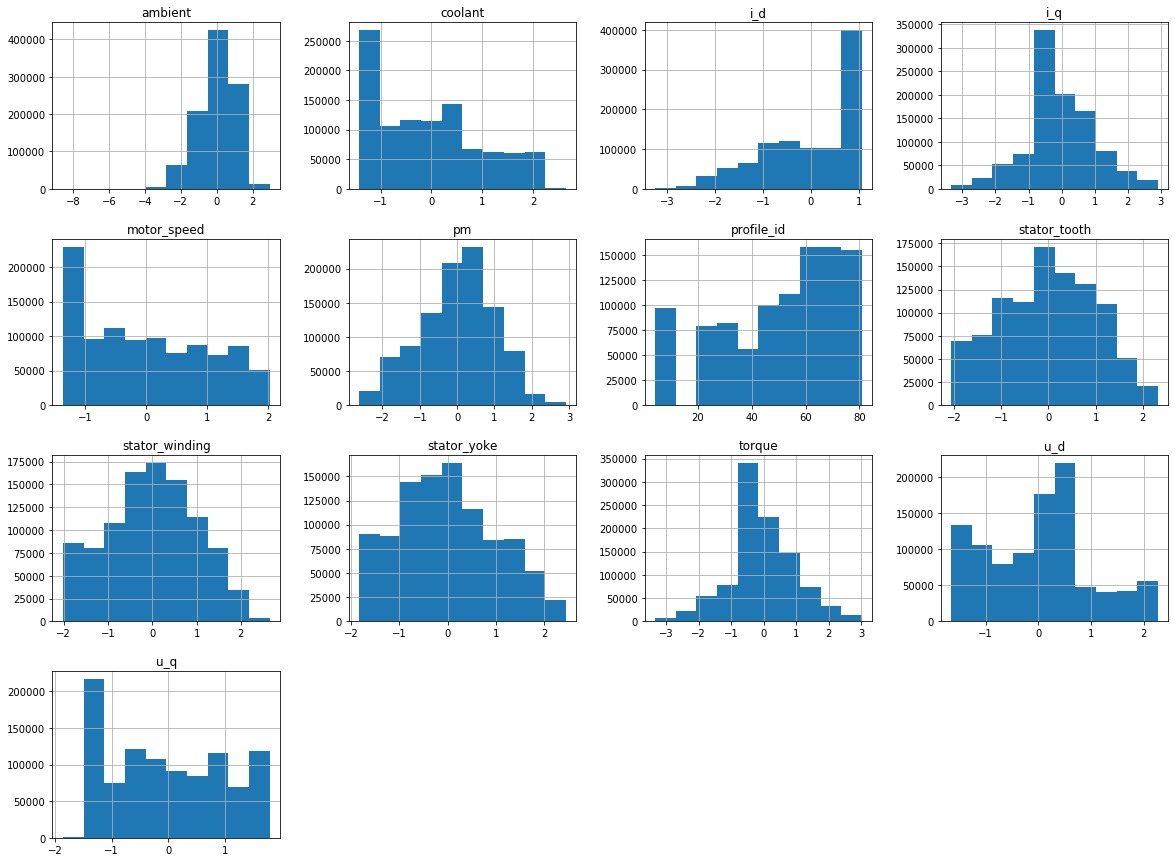

In [36]:
# Visualise motor data.
original_dataset.hist(figsize = (20,15))

# Save plot.
hist_string = r'C:\Users\ASUS-PC\OneDrive\Cloudforest Technologies\M. Projects\Yellow Cuckoo\initial_hist.png'
plt.savefig(hist_string)

plt.show()

In [37]:
def split_train_test(data, test_ratio):
    """Split Training & Test Data
    ======================================
    Splits original dataset into training and evaluation data.
    
    Args:
        data (dataframe) - Original test data.
        test_ratio (int) - Ratio for splitting dataset as training percentage.
        
    Returns:
        data_train (dataframe) - Dataframe with training data slice.
        data_test (dataframe) - Dataframe with testing data slice.
    """

    # Random seed setting ensures identical data split between calls
    np.random.seed(42)
    shuffled_indices = np.random.permutation(len(data))

    test_set_size = int(len(data) * test_ratio)

    # Create slices of test and training indices
    train_indices = shuffled_indices[test_set_size:]
    test_indices = shuffled_indices[:test_set_size]

    return data.iloc[train_indices], data.iloc[test_indices]

In [38]:
# Split data into training and test sets
training_set, test_set = split_train_test(original_dataset, 0.8)

len(training_set)

199614

In [87]:
# Create sample subset of training set (training set is large).
eda_subset, eda_discard = train_test_split(training_set, test_size = 0.95, random_state = 42) 

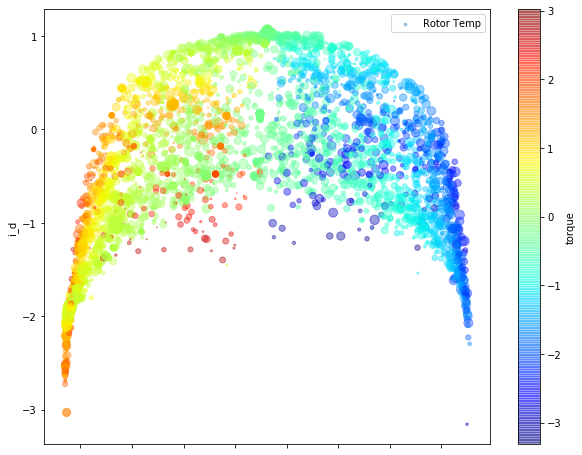

In [97]:
# Visualise relationship between torque, current, voltage and rotor temperature
eda_subset.plot(kind = "scatter", x = "u_d", y = "i_d", alpha = 0.4, figsize = (10, 8),
    s = eda_subset["pm"] * 50, label = "Rotor Temp",
    c = "torque", cmap = plt.get_cmap("jet"), colorbar = True)

plt.legend()

plt.show()

No handles with labels found to put in legend.


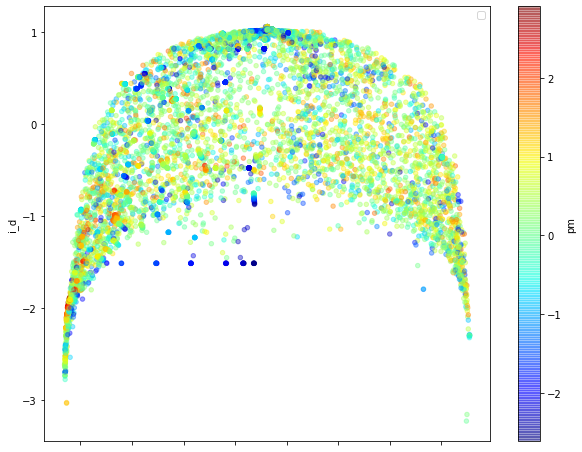

In [98]:
# Visualise relationship between torque, current, voltage and rotor temperature
eda_subset.plot(kind = "scatter", x = "u_d", y = "i_d", alpha = 0.4, figsize = (10, 8),
    c = "pm", cmap = plt.get_cmap("jet"), colorbar = True,
    )

plt.legend()

plt.show()

In [99]:
# s = eda_subset["torque"] * 50, label = "torque",